## Introduction to pandas for finance

Whenever a python programmer works with large sets of data, pandas becomes their best friend: this is especially true in the world of finance where stock market data is reported every millisecond across thousands of securities. In this section, we will go over the basics of the pandas library.

Before we begin, we must understand what pandas is and what it is used for. Pandas is a software library written for the Python programming language for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series.

Before importing pandas, we must install the pandas software library. Depending on your IDE and OS, the process may vary so see the installation guide for details:

    https://pandas.pydata.org/docs/getting_started/install.html
    
To import, write the following in the first line of your .py file. We will follow convention and refer to the pandas package as ‘pd’ in the remainder of our code:

In [41]:
import pandas as pd

For the examples in this guide, we will also be importing matplotlib for data visualization, yfinance to get financial data from global securities markets, and requests to extract economic data from the internet.

In [42]:
import matplotlib.pyplot as plt
import requests
import yfinance as yf

Now that we have downloaded and imported the pandas data science library, we are ready to dive right in. The first data type we will cover is called a series. You can think of this as a column of data, each row entry referring to a single datapoint. Note that to reference a single data point, we must know the name of the series which stores it and the entry at which it exists. These entries are similar to indices as they also begin at 0 and count upwards.

In [43]:
my_series = pd.Series(['a', 'b', 'c', 'd'])
print(my_series)

0    a
1    b
2    c
3    d
dtype: object


Series are built upon numpy’s array type but add some additional functionality that is specific to the pandas library. So while the array operations from numpy work exactly the same, we can also do the following:

In [44]:
ticker_data = [45.06, 167.32, 372.90, 41.36]
tickers = ['WFC', 'JPM', 'GS', 'BOA']
ticker_series = pd.Series(ticker_data, index=tickers, name='Ticker Data')
print(ticker_series)

WFC     45.06
JPM    167.32
GS     372.90
BOA     41.36
Name: Ticker Data, dtype: float64


Above we have changed the row indices from integers to strings and assigned a non-identifying name that is associated with the series. In this example, the name is 'Ticker Data' and it will be displayed whenever we print the series.

As a rule of thumb, referencing a row value in any given pandas series is nearly identical to how we would typically reference the familiar dictionary type, we use box notation:

In [45]:
my_stock_price = ticker_series['JPM']
print(my_stock_price)

167.32


Now that we have covered series, we can get to the real bread and butter of pandas: dataframes. While a series is a single column, a dataframe represents an entire matrix with infinitely many rows AND infinitely many columns. We can store structured data within these dataframes and reference any individual cell using its (row, column) location. Create your dataframe from a ‘comma separated file’ (.csv) as follows:

In [46]:
df = pd.read_csv('https://datahub.io/core/cpi/r/cpi.csv')
#Note that if the data we wish to access is stored locally, replace the link with the filepath
print(df)

     Country Name Country Code  Year         CPI
0     Afghanistan          AFG  2004   63.131893
1     Afghanistan          AFG  2005   71.140974
2     Afghanistan          AFG  2006   76.302178
3     Afghanistan          AFG  2007   82.774807
4     Afghanistan          AFG  2008  108.066600
...           ...          ...   ...         ...
6931       Zambia          ZMB  2010  100.000000
6932       Zambia          ZMB  2011  106.429397
6933       Zambia          ZMB  2012  113.428087
6934       Zambia          ZMB  2013  121.342732
6935       Zambia          ZMB  2014  130.821971

[6936 rows x 4 columns]


In the above example, we have downloaded and stored global CPI numbers within a pandas dataframe. Following .csv convention, the names of each dataframe column become the .csv column header from our structured data file. The rows remain integers starting at 0. 

By using python’s familiar slicing notation, we can select certain rows and thus print the economic data for a specific country:

In [47]:
cpi_rows = df[:4]
print(cpi_rows)

  Country Name Country Code  Year        CPI
0  Afghanistan          AFG  2004  63.131893
1  Afghanistan          AFG  2005  71.140974
2  Afghanistan          AFG  2006  76.302178
3  Afghanistan          AFG  2007  82.774807


Or by referencing a column name, we can select certain columns and thus print a specific economic metric. These columns can be identified using a list:

In [48]:
cpi_columns = df[['Country Name', 'CPI']]
print(cpi_columns)

     Country Name         CPI
0     Afghanistan   63.131893
1     Afghanistan   71.140974
2     Afghanistan   76.302178
3     Afghanistan   82.774807
4     Afghanistan  108.066600
...           ...         ...
6931       Zambia  100.000000
6932       Zambia  106.429397
6933       Zambia  113.428087
6934       Zambia  121.342732
6935       Zambia  130.821971

[6936 rows x 2 columns]


Using these two concepts in unison, we can select and extract any (row, column) segment from our larger pandas dataframe. Say we only want to see Zambia's CPI in 2013 and 2014. We would write the following:

In [49]:
zambia_df = df[['Country Name', 'CPI', 'Year']][6934:6936]
print(zambia_df)

     Country Name         CPI  Year
6934       Zambia  121.342732  2013
6935       Zambia  130.821971  2014


Notice how the ordering of the strings which reference the wanted economic information (stored within the above list) has changed the ordering of our dataframe's column names. By requestion columns in the order ['Country Name', 'CPI', 'Year'] we have received them in that order, different than that of our df variable which had ['Country Name', 'Year', 'CPI'].

To get a specific value or datapoint from within our dataframe we could apply the concept from the above example, or use the built-in pandas .iloc function. iloc is a purely integer-location-based indexing for selection by position; this means that we must have the integer location of our target data point in the form (row, column). Say we know that Afganistan's CPI in 2004 is located at row 0 and column 3. We can access this value as follows:

In [50]:
target_cpi = df.iloc[0,3]
print(target_cpi)

63.1318927309003


Alternatively, we may continue to use the column's string name to locate a singular value (instead of using the integer index for both row and column). To do so, we will use .loc (instead of .iloc) followed by the row index and column name:

In [51]:
target_cpi = df.loc[0, 'CPI']
print(target_cpi)

63.1318927309003


Rows and/or columns can we removed using the .drop function. To drop a column we must also specify that we are refering to axis 1 ie, the columns:

In [52]:
no_countrycode = df.drop(columns=['Country Code'])
print(no_countrycode)

     Country Name  Year         CPI
0     Afghanistan  2004   63.131893
1     Afghanistan  2005   71.140974
2     Afghanistan  2006   76.302178
3     Afghanistan  2007   82.774807
4     Afghanistan  2008  108.066600
...           ...   ...         ...
6931       Zambia  2010  100.000000
6932       Zambia  2011  106.429397
6933       Zambia  2012  113.428087
6934       Zambia  2013  121.342732
6935       Zambia  2014  130.821971

[6936 rows x 3 columns]


To drop a row there is no need to tell pandas which axis we wish to modify. Simply provide a row index or multiple as a list:

In [53]:
rm_afganistan_data = df.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(rm_afganistan_data)

     Country Name Country Code  Year         CPI
11        Albania          ALB  1991    5.115616
12        Albania          ALB  1992   16.677187
13        Albania          ALB  1993   30.853588
14        Albania          ALB  1994   37.815716
15        Albania          ALB  1995   40.762778
...           ...          ...   ...         ...
6931       Zambia          ZMB  2010  100.000000
6932       Zambia          ZMB  2011  106.429397
6933       Zambia          ZMB  2012  113.428087
6934       Zambia          ZMB  2013  121.342732
6935       Zambia          ZMB  2014  130.821971

[6925 rows x 4 columns]


Some other usefull pandas .drop functions include: 
    
    DataFrame.dropna
        Returns a dataframe with labels on given axis omitted where (all or any) data are missing.

    DataFrame.drop_duplicates
        Returns a dataframe with duplicate rows removed, optionally only considering certain columns.
        
We will now return to a previously used concept, that is using pandas to pull economic data from the internet and websites. An important database for economists is FRED. FRED is a collection of economic time series data updated and maintained by the St. Louis Fed. Below we will plot US GDP from 2006 to the most recent report. To do so, locate the download for US GDP data on FRED. Assign this url as a string to a variable (called url in the below example) and make a requests call to download the data. We will use pandas to interpret the CSV file as structured data before using matplotlib to visualize the pandas dataframe. Note that this requires an internet connection.

Check out FRED here: https://fred.stlouisfed.org/

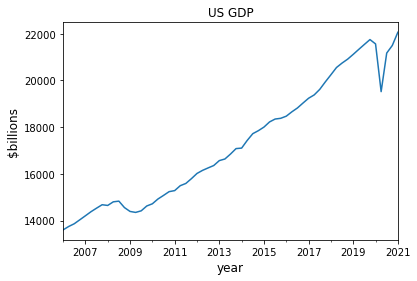

In [54]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDP&scale=left&cosd=1947-01-01&coed=2021-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-06-14&revision_date=2021-06-14&nd=1947-01-01'

data = pd.read_csv(url, index_col=0, parse_dates=True)

ax = data['2006':].plot(title='US GDP', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('$billions', fontsize=12)
plt.show()

We can accomplish a similar task while making calls to the Yahoo Finance API. Understand that the data being received is stored as a dataframe using the pandas library before it is plotted. Below we demonstrate using Cboe's Market Volatility Index (VIX):

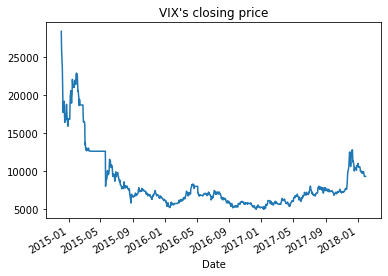

In [56]:
ticker = yf.Ticker('VIX')
vix_df = ticker.history(period="max")
vix_df['Close'].plot(title="VIX's closing price")
plt.show()

It is not hard to see why pandas is such a powerful tool and just how endless the possibilities are when pairing it with a data visualization library such as matplotlib. We will be referring to these basic concepts in the following repositories while also developing more advanced pandas skills. To learn more about the hundreds of pandas functionalities, check out the official documentation: 
    https://pandas.pydata.org/docs/ 
    https://pandas.pydata.org/pandas-docs/stable/reference/index.html